# Stroke Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.set_cmap("inferno")
import seaborn as sns

<Figure size 432x288 with 0 Axes>

In [2]:
data = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
data["bmi"].fillna(data["bmi"].mean(), inplace=True)

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


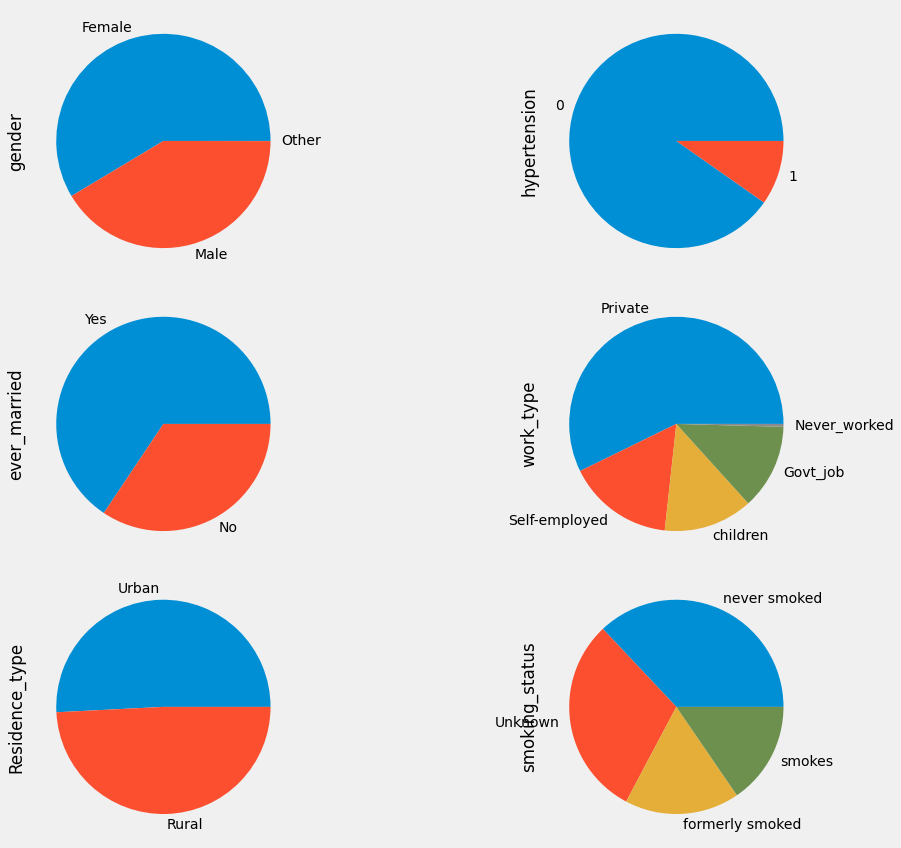

In [5]:
plt.figure(figsize=(18,12))
plt.subplot(321)
data["gender"].value_counts().plot(kind="pie")
plt.subplot(322)
data["hypertension"].value_counts().plot(kind="pie")
plt.subplot(323)
data["ever_married"].value_counts().plot(kind="pie")
plt.subplot(324)
data["work_type"].value_counts().plot(kind="pie")
plt.subplot(325)
data["Residence_type"].value_counts().plot(kind="pie")
plt.subplot(326)
data["smoking_status"].value_counts().plot(kind="pie")
plt.tight_layout()
plt.show()

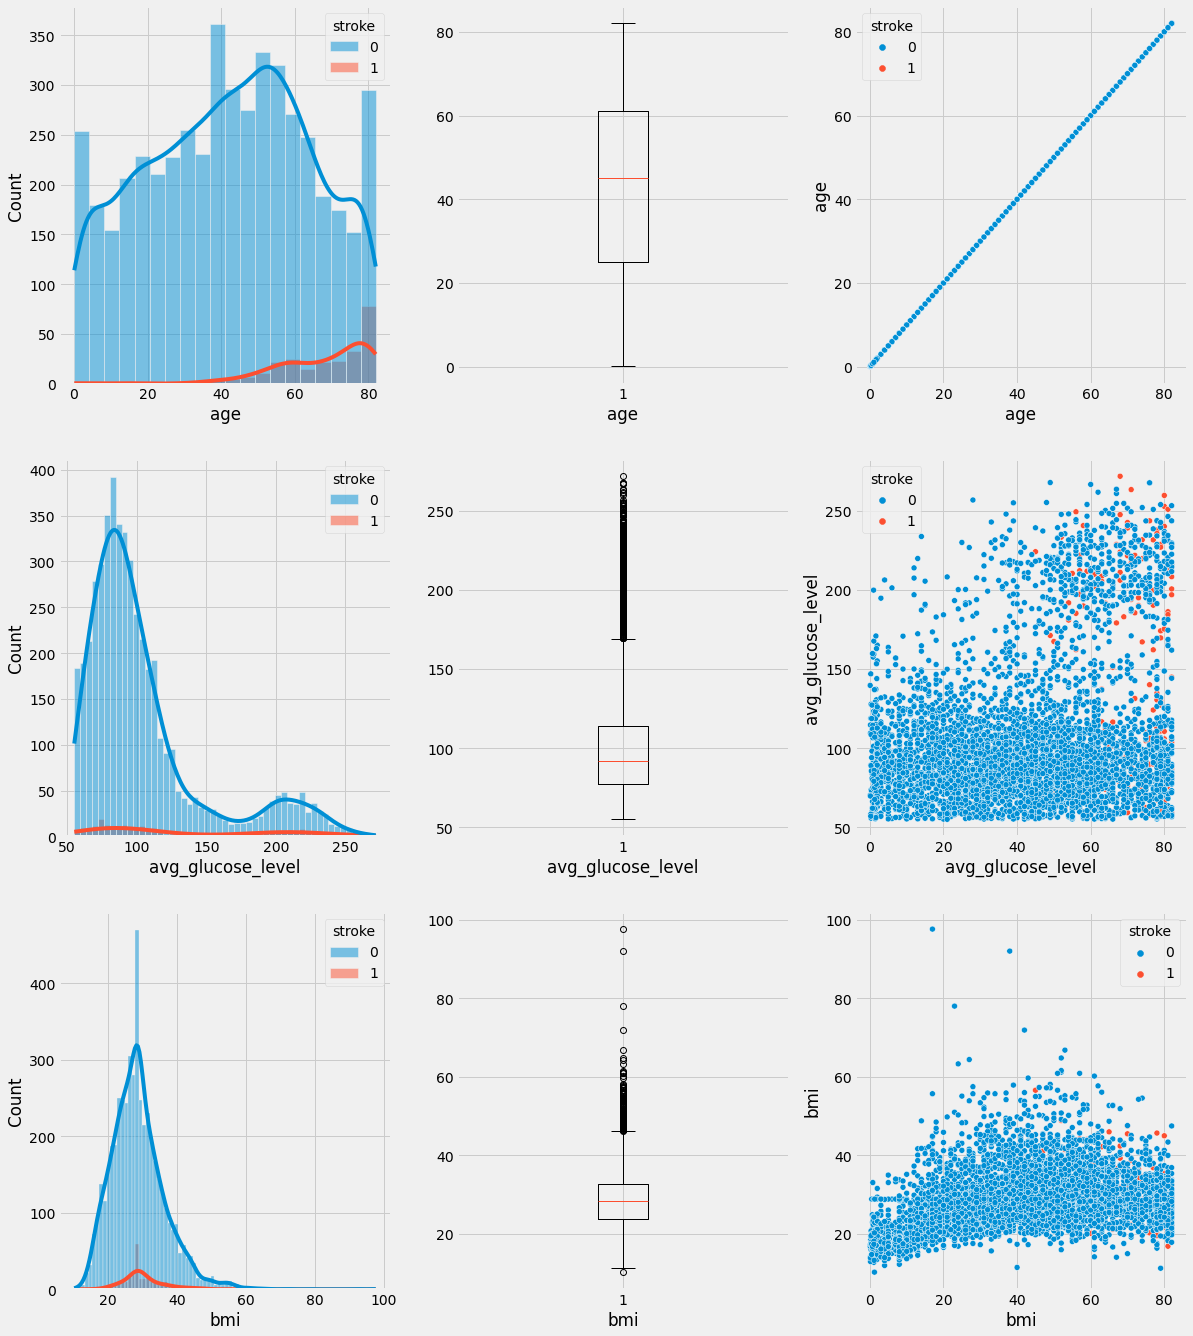

In [6]:
columns = ["age","avg_glucose_level", "bmi"]

a = 3
b = 3 
c = 1

fig = plt.figure(figsize=(18,22))

for i in columns:
    plt.subplot(a,b,c)
    plt.xlabel(i)
    sns.histplot(data=data, x=i, hue="stroke", kde=True)
    c = c+1

    plt.subplot(a,b,c)
    plt.xlabel(i)
    plt.boxplot(x=data[i])
    c = c+1

    plt.subplot(a,b,c)
    plt.xlabel(i)
    sns.scatterplot(data=data, x="age", y=i, hue="stroke")
    c = c+1

plt.show()

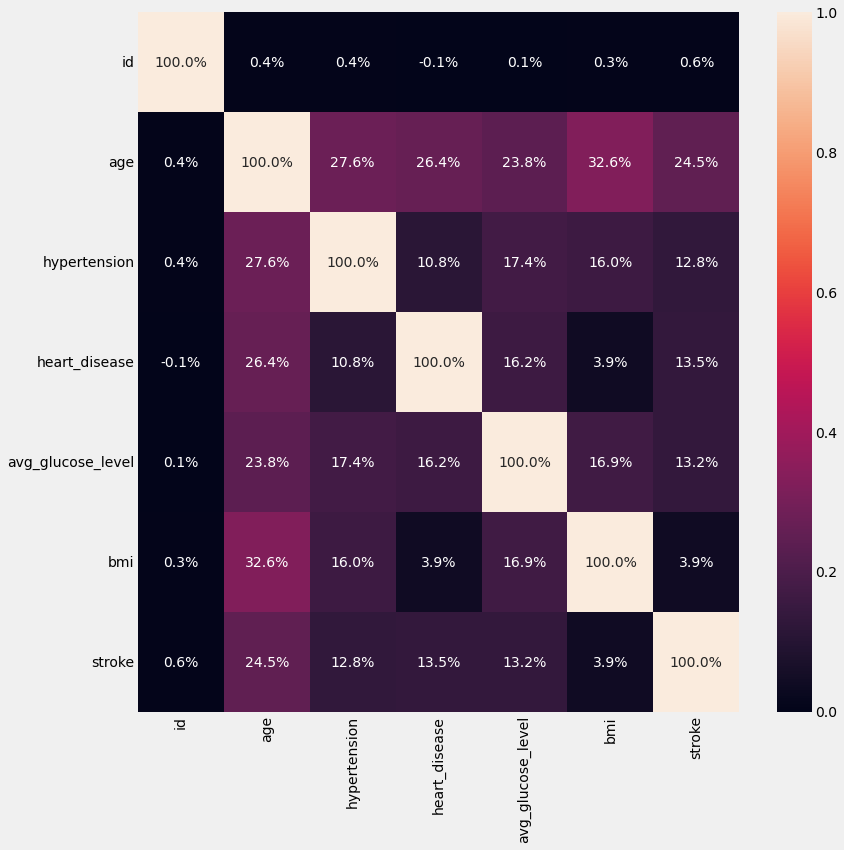

In [7]:
corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt=".1%")
plt.show()

In [8]:
dummy = pd.get_dummies(data[["gender","ever_married","work_type","Residence_type","smoking_status"]])
data.drop(["gender","ever_married","work_type","Residence_type","smoking_status"], axis=1, inplace=True)
data = pd.concat([data, dummy], axis=1)

In [9]:
X = data.drop(["id","stroke"], axis=1).values
y = data["stroke"].values

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=17)

# Decision Tree

In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

train_preds = dt.predict(X_train)
val_preds = dt.predict(X_val)

print("Accuracy on train: ",accuracy_score(y_train, train_preds))
print("Accuracy on validation: ",accuracy_score(y_val, val_preds))

Accuracy on train:  1.0
Accuracy on validation:  0.906885758998435


In [12]:
fi = pd.DataFrame()
fi["feature"] = data.drop(["id","stroke"],axis=1).columns
fi["feature importance %"] = dt.feature_importances_*100
fi

,feature,feature importance %
0,age,15.917976
1,hypertension,2.512437
2,heart_disease,0.902750
3,avg_glucose_level,30.681862
4,bmi,26.430941
5,gender_Female,1.509985
6,gender_Male,2.969542
7,gender_Other,0.000000
8,ever_married_No,1.204433
9,ever_married_Yes,1.174341


# Random Forests

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

train_preds_rf = rf.predict(X_train)
val_preds_rf = rf.predict(X_val)

print("Accuracy on train: ",accuracy_score(y_train, train_preds_rf))
print("Accuracy on validation: ",accuracy_score(y_val, val_preds_rf))

Accuracy on train:  1.0
Accuracy on validation:  0.94679186228482


In [14]:
fi_rf = pd.DataFrame()
fi_rf["feature"] = data.drop(["id","stroke"],axis=1).columns
fi_rf["feature importance %"] = rf.feature_importances_*100
fi_rf

,feature,feature importance %
0,age,24.108258
1,hypertension,2.686730
2,heart_disease,2.178607
3,avg_glucose_level,26.388566
4,bmi,22.391579
5,gender_Female,1.725325
6,gender_Male,1.817569
7,gender_Other,0.000000
8,ever_married_No,0.996870
9,ever_married_Yes,0.914012
